In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
print("Tensorflow version is {}".format(tf.__version__))

Tensorflow version is 1.8.0


In [4]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


### Check the Dataset shape
- 28x28 image를 다룬다.

In [5]:
def print_np(x):
    print("Shape is %s" % (x.shape,))
    print("Values look like \n %s" % (x))

In [6]:
print("Train shape")
print_np(mnist.train.images) # 28 * 28 = 784
print_np(mnist.train.labels)

Train shape
Shape is (55000, 784)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape is (55000, 10)
Values look like 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
print("Test shape")
print_np(mnist.test.images)
print_np(mnist.test.labels)

Test shape
Shape is (10000, 784)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape is (10000, 10)
Values look like 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print("Validation shape")
print_np(mnist.validation.images)
print_np(mnist.validation.labels)

Validation shape
Shape is (5000, 784)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape is (5000, 10)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


### Plot Train images

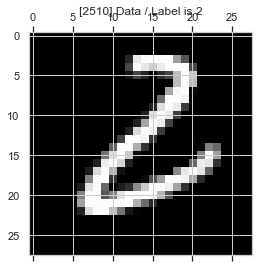

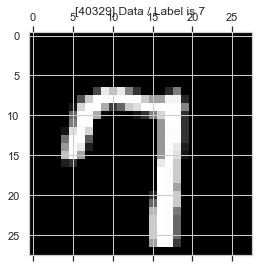

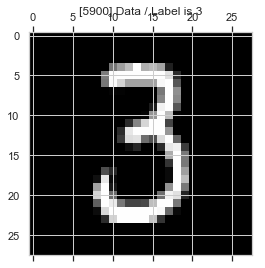

In [10]:
ntrain = mnist.train.images.shape[0]
nsample = 3
randidx = np.random.randint(ntrain, size=nsample)
for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28,28))
    label = np.argmax(labelvec) # one-hot vector --> label
    plt.matshow(img, cmap=plt.get_cmap("gray"))
    plt.title("[{}] Data / Label is {}".format(i, label))

### Get Random MiniBatch

1. Random Permute (순서를 섞는다.)

In [19]:
ntrain = 10
randindices = np.random.permutation(ntrain)
print(randindices.shape)
print(randindices)

(10,)
[3 7 5 6 8 1 9 0 2 4]


2. select minibatch

In [20]:
ntrain = 10
nbatch = 4
niter = ntrain // nbatch + 1
for i in range(niter):
    currindices = randindices[i * nbatch : (i+1) * nbatch]
    print("Iter : [{}] Batch index: {}".format(i, currindices))
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    print("  - Shape of 'xbatch' is %s" % (xbatch.shape,))
    print("  - Shape of 'ybatch' is %s" % (ybatch.shape,))

Iter : [0] Batch index: [3 7 5 6]
  - Shape of 'xbatch' is (4, 784)
  - Shape of 'ybatch' is (4, 10)
Iter : [1] Batch index: [8 1 9 0]
  - Shape of 'xbatch' is (4, 784)
  - Shape of 'ybatch' is (4, 10)
Iter : [2] Batch index: [2 4]
  - Shape of 'xbatch' is (2, 784)
  - Shape of 'ybatch' is (2, 10)


##### 데이터(input, output모두)를 한줄로 펴서 row방향으로 차곡차곡 쌓아놓고 사용하자!